In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
Base=automap_base()

In [6]:
# reflect an existing database into a new model
Base.prepare(autoload_with=engine)
# reflect the tables


In [7]:
Base.classes.keys()

['measurement', 'station']

In [8]:
# View all of the classes that automap found


In [9]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.


('2017-08-23',)

In [11]:
recent_date= session.query(func.max(Measurement.date)).scalar()
print(recent_date)

2017-08-23


In [12]:
last_year=dt.date(2017,8,23)-dt.timedelta(days=365)

Text(0, 0.5, 'Inches')

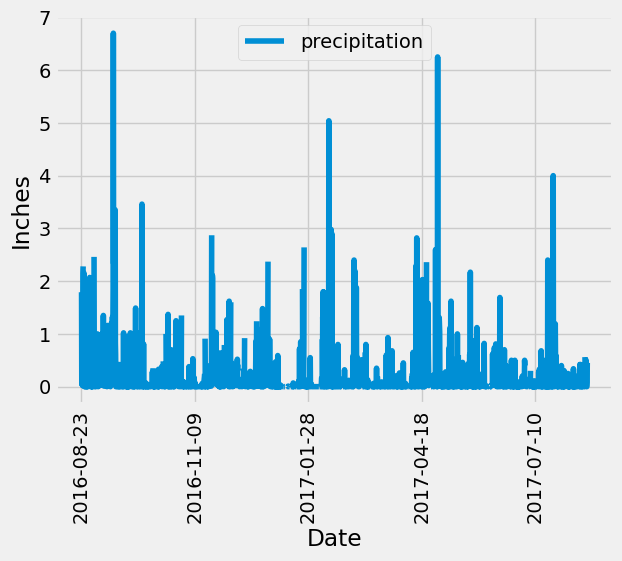

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [13]:
sel = [Measurement.date,
       Measurement.prcp]

precipation_scores = session.query(*sel).\
    filter(Measurement.date >=last_year).\
    order_by(Measurement.date)

In [14]:
for x in precipation_scores:
    print(x)
    

('2016-08-23', 0.0)
('2016-08-23', 0.15)
('2016-08-23', 0.05)
('2016-08-23', None)
('2016-08-23', 0.02)
('2016-08-23', 1.79)
('2016-08-23', 0.7)
('2016-08-24', 0.08)
('2016-08-24', 2.15)
('2016-08-24', 2.28)
('2016-08-24', None)
('2016-08-24', 1.22)
('2016-08-24', 2.15)
('2016-08-24', 1.45)
('2016-08-25', 0.08)
('2016-08-25', 0.08)
('2016-08-25', 0.0)
('2016-08-25', 0.0)
('2016-08-25', 0.21)
('2016-08-25', 0.06)
('2016-08-25', 0.11)
('2016-08-26', 0.0)
('2016-08-26', 0.03)
('2016-08-26', 0.02)
('2016-08-26', 0.04)
('2016-08-26', 0.0)
('2016-08-26', 0.01)
('2016-08-27', 0.0)
('2016-08-27', 0.18)
('2016-08-27', 0.02)
('2016-08-27', 0.0)
('2016-08-27', 0.12)
('2016-08-27', None)
('2016-08-28', 0.01)
('2016-08-28', 0.14)
('2016-08-28', 0.14)
('2016-08-28', 0.14)
('2016-08-28', 0.6)
('2016-08-28', 2.07)
('2016-08-29', 0.0)
('2016-08-29', 0.17)
('2016-08-29', 0.04)
('2016-08-29', None)
('2016-08-29', 0.0)
('2016-08-29', 0.35)
('2016-08-29', 0.9)
('2016-08-30', 0.0)
('2016-08-30', 0.0)
('2016

In [15]:
precipitationdf=pd.DataFrame(precipation_scores, columns=['date','total_precip'])

In [16]:
precipitationdf.head()

,date,total_precip
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


In [17]:
precipitationdf.sort_values(by="date",ascending=True)

,date,total_precip
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2228,2017-08-23,0.08
2226,2017-08-23,0.00
2227,2017-08-23,0.00


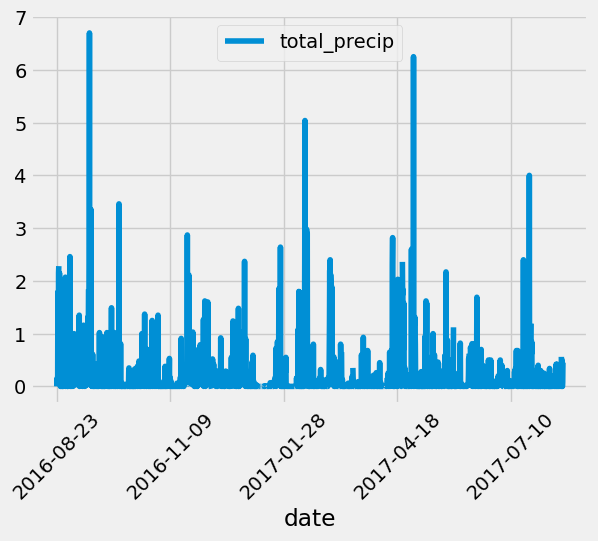

In [39]:
precipitationdf.plot(x='date', y='total_precip', rot=45)
plt.show()

In [20]:
precipitationdf.describe()

,total_precip
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number of stations in the dataset

[(9,)]

In [21]:
total_station_num=session.query(Station.station).count()

In [22]:
print(total_station_num)

9


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
active_stations = (
    session.query(Measurement.station, func.count(Measurement.station))
    .group_by(Measurement.station)
    .order_by(func.count(Measurement.station).desc()) 
    .all()
)


In [24]:
print(active_stations)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

In [25]:
temp_stats=(session.query(func.min(Measurement.tobs),
                          func.max(Measurement.tobs),
                          func.avg(Measurement.tobs)
                          
)
.filter(Measurement.station=="USC00519281")
.all()
)

In [26]:
print(temp_stats)

[(54.0, 85.0, 71.66378066378067)]


In [27]:
latest_date = session.query(func.max(Measurement.date)).scalar()
latest_date = dt.datetime.strptime(latest_date, "%Y-%m-%d")

In [29]:
one_year_ago=latest_date-dt.timedelta(days=365)

In [33]:
last_12_months_temps = (
    session.query(Measurement.date, Measurement.tobs)
    .filter(Measurement.station =="USC00519281" )
    .filter(Measurement.date >= one_year_ago)  
    .order_by(Measurement.date)
    .all()
)

In [36]:
for date,temp in last_12_months_temps:
    print(x)

('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23', 0.45)
('2017-08-23'

Text(0.5, 4.183333333333314, 'Temperature')

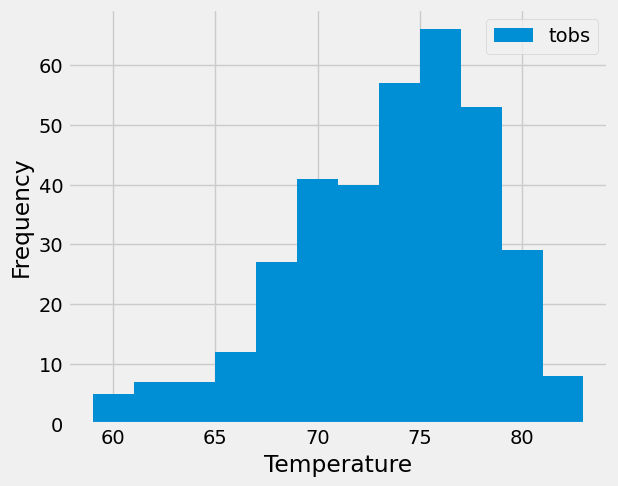

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

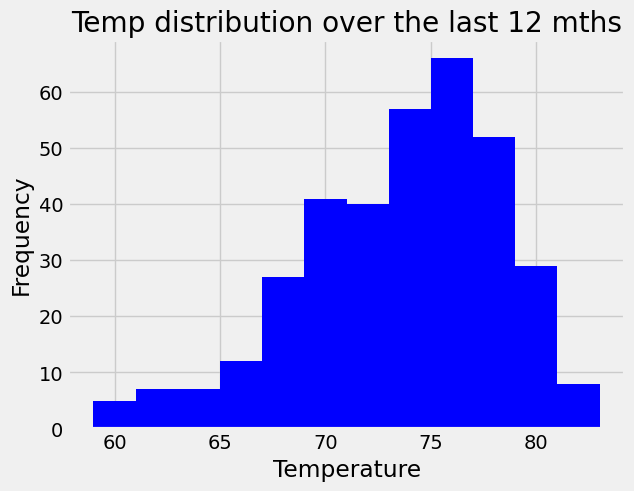

In [37]:
temperatures=[temp for date, temp in last_12_months_temps]

plt.hist(temperatures,bins=12, color='blue')
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temp distribution over the last 12 mths")
plt.show()


In [38]:
# Close Session
session.close()